## Step2 : After extracting data, do EDA  & Feature eng & Cleaning . 

In [187]:
import warnings
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from category_encoders.one_hot import OneHotEncoder
from sklearn import preprocessing
from datetime import datetime
import pickle
import sys
import json

In [188]:
sys.path.insert(0, './utils/')
import pre_processing_EDA as PEDA

In [189]:
data = pd.read_csv('data/data.csv')

In [190]:
# Any change on data will save in this dataframe to keep the origin in safe
data_ready = data.copy()

In [191]:
data_ready.head()

,Unnamed: 0,name,model,price,color,fuel_type,origin_car,car_license,lime_type,glass,...,passengers,ex_owners,alarm_devise,air_conditioner,CD_recorder,sunroof,leather_upholstery,central_closing,magnesium_rims,air_cushion
0,0,كيا برايد,2008,44000,أسود,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,...,NaN,يد اولى,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0
1,1,هونداي اكسنت,2013,58000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,...,4+1,يد اولى,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0
2,2,بيجو 508,2013,40000,أسود,بنزين,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,...,4+1,يد ثانيه,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,سكودا اوكتافيا,2010,70000,أزرق,ديزل,خصوصي,فلسطينية,عادي,الكتروني,...,4+1,3,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
4,4,سوبارو امبريزا,1999,33000,رصاصي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,...,4+1,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0


In [192]:
data_ready.columns

Index(['Unnamed: 0', 'name', 'model', 'price', 'color', 'fuel_type',
       'origin_car', 'car_license', 'lime_type', 'glass', 'motor_power',
       'car_speedometer', 'passengers', 'ex_owners', 'alarm_devise',
       'air_conditioner', 'CD_recorder', 'sunroof', 'leather_upholstery',
       'central_closing', 'magnesium_rims', 'air_cushion'],
      dtype='object')

In [193]:
data_ready.shape

(6864, 22)

In [194]:
# Describe Category features
data_ready.describe(include='O')

,name,color,fuel_type,origin_car,car_license,lime_type,glass,car_speedometer,passengers,ex_owners
count,6864,6864,6864,6864,6864,6864,6864,4923,6087,5214
unique,630,26,4,6,2,3,2,1261,43,360
top,سكودا اوكتافيا,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,100000,4+1,يد اولى
freq,499,1446,3970,5833,6789,3623,6338,107,4847,505


In [195]:
# Describe Numerical features
data_ready.describe()

,Unnamed: 0,model,price,motor_power,alarm_devise,air_conditioner,CD_recorder,sunroof,leather_upholstery,central_closing,magnesium_rims,air_cushion
count,6864.000000,6864.000000,6864.000000,6864.000000,4621.0,5761.0,5789.0,1815.0,3585.0,5586.0,5019.0,5293.0
mean,3894.292249,2008.616259,66933.643211,1740.494755,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,2245.501368,8.690874,57022.973482,589.470714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,1967.000000,1111.000000,106.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1936.750000,2005.000000,36000.000000,1400.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,3906.500000,2011.000000,55000.000000,1600.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,5838.250000,2015.000000,83000.000000,2000.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,7776.000000,2022.000000,999999.000000,9000.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Basic Information


In [196]:
data_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6864 non-null   int64  
 1   name                6864 non-null   object 
 2   model               6864 non-null   int64  
 3   price               6864 non-null   int64  
 4   color               6864 non-null   object 
 5   fuel_type           6864 non-null   object 
 6   origin_car          6864 non-null   object 
 7   car_license         6864 non-null   object 
 8   lime_type           6864 non-null   object 
 9   glass               6864 non-null   object 
 10  motor_power         6864 non-null   int64  
 11  car_speedometer     4923 non-null   object 
 12  passengers          6087 non-null   object 
 13  ex_owners           5214 non-null   object 
 14  alarm_devise        4621 non-null   float64
 15  air_conditioner     5761 non-null   float64
 16  CD_rec

# Handle Some Data Columns

### Handle ex_owner Column


In [197]:
# Display the ex_owners unique value
data_ready['ex_owners'].unique()

array(['يد اولى ', 'يد ثانيه ', '3 ', nan, 'ثالثه ', '٣ ', '٤ ', '6 ',
       'يد ثانية ', '٢ ', 'اولى  ', 'اولى ', '0 ', 'يد 5 ', 'يد 4 ',
       '11 ', '2 ', 'ثانية ', 'يد ثالثة ', 'يد 2 ', 'يد تانيه  ', '1 ',
       'يد أولى  ', 'يد٢ ', 'ايد اولى  ', 'يد 0 ', '5 ', 'يد اولى  ',
       'يد ثالثه ', '--- ', '03 ', 'يد أولى ', 'يد ثالثة  ', 'ايد ثانيه ',
       '000 ', 'يد٣ ', '، ', 'يد أولئ أصحاب سابقون صفر ', 'ايد ثانية  ',
       '١ ', 'يد اولي ', 'يد رابعه ', 'تانبه ', '4 ', 'غير منمره ',
       'يد تانية ', '٥ ', 'صفر ', 'أستيراد ألماني  ', 'يد اولى الماني  ',
       '00 ', '9 ', 'يد 8 ', '7 ', 'استيراد مباشر من اوروبا  ',
       'يد عاشرة ', 'يد خامساً  ', '4  ', 'صفر  ', 'ثالثة ', 'يد ثانية  ',
       'يد اوله ', 'اربعة ', 'يد صفر  ', '00000000 ',
       'مستوردة غير منمرة ', 'مش منمره ', '10 ', 'يد تالته ', 'مستورد ',
       'يد صفر ', '000000 ', '8 ', 'مستوردة يد اولى ',
       'مستوردة غير مرخصة ', 'أولى  ', 'يد 3 ', 'استيراد مباشر ',
       'يد تانيه ', '. ', 'يد رابعه  ', '

In [198]:
# Modify ex owners data to number of ex owner
data_ready['ex_owners'] = PEDA.modify_ex_owner(data_ready['ex_owners'])

In [199]:
# Display the ex_owners unique value
data_ready['ex_owners'].unique()

array([ 1.,  2.,  3., nan,  4.,  5.])

### Handle car_speedometer Column


In [200]:
# Display the car_speedometer values
data_ready['car_speedometer']

0       ١٨٣٠٠٠ 
1        42000 
2        85000 
3        30000 
4           NaN
         ...   
6859     50000 
6860       140 
6861        40 
6862    60 الف 
6863     82الف 
Name: car_speedometer, Length: 6864, dtype: object

In [201]:
# Modified car_speedometer column
data_ready['car_speedometer'] = PEDA.modify_speedometer(data['car_speedometer'])

In [202]:
# Display car_speedometer uniaue value
data_ready['car_speedometer'].unique()

array([183000, 42000, 85000, 30000, nan, 105000, 50000, 180000, 120000,
       14, 220000, 100000, 14000, 48000, 69000, 129100, 5000000, 150000,
       75000, 57000, 25000, 78000, 70000, 7000, 58000, 127000, 15000,
       4700, 60000, 84000, 18000, 45000, 297000, 80000, 65000, 280000,
       115000, 124000, 160000, 130000, 200000, 95000, 140000, 55000,
       47000, 83000, 20000, 88000, 135000, 190000, 370000, 4000, 298000,
       82000, 81000, 40000, 46500, 73000, 125000, 418000, 165000, 92000,
       400000, 90000, 363000, 35000, 77000, 68000, 10110, 132000, 808887,
       65288, 41500, 270000, 101000, 46000, 67000, 65788879999, 33000,
       1000, 10002, 300000, 49000, 201788, 800000, 1234, 246000, 16000,
       7500, 62000, 114000, 750000, 79000, 155000, 192000, 216560, 13000,
       110000, 6800, 139000, 117000, 230000, 250000, 123000, 159000,
       185000, 24000, 6200000, 59000, 145000, 44000, 17000, 21000, 5500,
       19000, 74000, 153000, 53000, 9977, 350000, 26000, 102000, 2

### Handle Passengers Column


In [203]:
data_ready['passengers'].value_counts()


passengers
4+1             4847
6+1              613
7+1              167
2+1              107
5+1               92
3+1               76
1+1               48
٤+١               33
8+1               17
4+١               14
اكثر من 10         9
1                  9
١+٤                7
4+1                7
1+7                4
9+1                3
6+١                3
٧                  3
٦+١                2
٧+1                2
1+2                2
6x1                1
مثال: 4 + 1        1
5+2                1
٥+١                1
4+2                1
1+٤                1
4\١                1
7:1                1
22                 1
1٠4                1
٨+١                1
7 =1               1
٧+١                1
+1                 1
6±١                1
000                1
7,+ 1              1
2                  1
8                  1
7.1                1
4+1                1
2/1                1
Name: count, dtype: int64

In [204]:
# Modified passengers column
data_ready['passengers'] = PEDA.modify_passengers(data_ready['passengers'])

# Display the passengers unique value
data_ready['passengers'].unique()

array([nan,  4.,  5.,  8.,  1.,  6.,  7.,  3.,  2.,  9.])

## Duplicates

In [205]:
# Find the duplicates
data_ready.duplicated().sum()

0

## Data type for data

In [206]:
data_ready.dtypes

Unnamed: 0              int64
name                   object
model                   int64
price                   int64
color                  object
fuel_type              object
origin_car             object
car_license            object
lime_type              object
glass                  object
motor_power             int64
car_speedometer        object
passengers            float64
ex_owners             float64
alarm_devise          float64
air_conditioner       float64
CD_recorder           float64
sunroof               float64
leather_upholstery    float64
central_closing       float64
magnesium_rims        float64
air_cushion           float64
dtype: object

## Preparation and transformation

### Handle missing values

In [207]:
# Get the columns that has at least one nan value
data_ready[data_ready.columns[data_ready.isna().any()]].isna().sum()

car_speedometer       2534
passengers             813
ex_owners             2740
alarm_devise          2243
air_conditioner       1103
CD_recorder           1075
sunroof               5049
leather_upholstery    3279
central_closing       1278
magnesium_rims        1845
air_cushion           1571
dtype: int64

## Use knn for fill missing of numeric columns

In [208]:
# Define the columns that will enter the imputer
features_imputer = ['car_speedometer', 'ex_owners']

# Define imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

# Fit on the dataset
imputer.fit(data_ready[features_imputer])

# Transform the dataset
data_ready[features_imputer] = imputer.transform(data_ready[features_imputer])

data_ready[features_imputer] = data_ready[features_imputer].astype(int)

In [209]:
 #Re-get the columns that has at least one nan value
data_ready.columns[data_ready.isna().any()]

Index(['passengers', 'alarm_devise', 'air_conditioner', 'CD_recorder',
       'sunroof', 'leather_upholstery', 'central_closing', 'magnesium_rims',
       'air_cushion'],
      dtype='object')

### Use mode value for passengers columns


In [210]:
# Fill columns with its mode value
data_ready['passengers'] = PEDA.fill_passenger(data_ready['passengers'])

In [211]:
# Re-get the columns that has at least one nan value
data_ready.columns[data_ready.isna().any()]

Index(['alarm_devise', 'air_conditioner', 'CD_recorder', 'sunroof',
       'leather_upholstery', 'central_closing', 'magnesium_rims',
       'air_cushion'],
      dtype='object')

In [212]:
feature_columns = ['alarm_devise', 'air_conditioner', 'CD_recorder', 'sunroof',
                    'leather_upholstery', 'central_closing', 'magnesium_rims', 'air_cushion']

# Replace null values with 0 for the specified features
data_ready[feature_columns] = data_ready[feature_columns].fillna(0)


In [213]:
# Re-get the columns that has at least one nan value
data_ready.columns[data_ready.isna().any()]

Index([], dtype='object')

### Missing value (NaN) solved 

## Rename columns

In [216]:
# Dictionary contains the previous name column and what I want the column name set to
feature_rename = {
    'origin_car':'car_type',
    'car_license': 'license_type',
    'glass': 'glass_type'
}

# Rename specific columns based on the feature_name dictionary
data_ready.rename(columns=feature_rename, inplace=True)

# Display the columns after rename 
data_ready.columns

Index(['Unnamed: 0', 'name', 'model', 'price', 'color', 'fuel_type',
       'car_type', 'license_type', 'lime_type', 'glass_type', 'motor_power',
       'car_speedometer', 'passengers', 'ex_owners', 'alarm_devise',
       'air_conditioner', 'CD_recorder', 'sunroof', 'leather_upholstery',
       'central_closing', 'magnesium_rims', 'air_cushion'],
      dtype='object')

In [217]:
# Create dataframe to display the arabic label name in right format for plotting
display_data = data_ready.copy()
for feature in display_data.select_dtypes(include='object').columns:
    temp = []
    for row in display_data[feature]:
        temp.append(get_display(arabic_reshaper.reshape(row)))
    temp = pd.Series(temp)
    display_data[feature] = temp

## Numaric columns


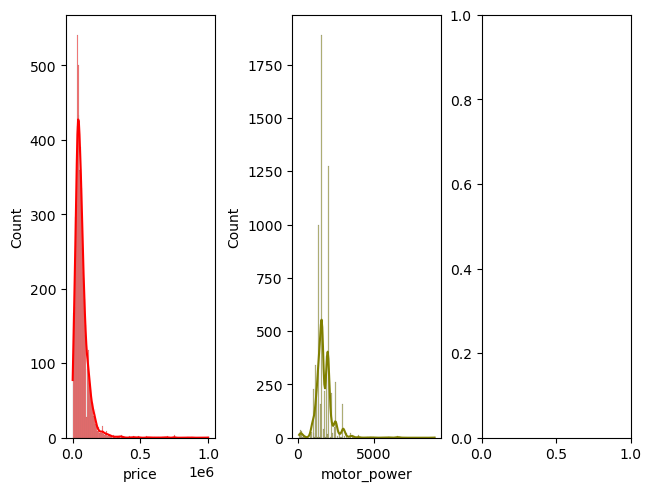

In [218]:
# Display Numaric columns
fig, axs = plt.subplots(1, 3, constrained_layout = True)

sns.histplot(data=data_ready, x="price", kde=True, color="red", ax=axs[0])
sns.histplot(data=data_ready, x="motor_power", kde=True, color="olive", ax=axs[1])
# car_speedometer column will rais MemoryError because it has huge number (outlier)
#sns.histplot(data=data_ready, x="car_speedometer", kde=True, color="gold", ax=axs[2])

plt.show()

## Handle Outlier for some numaric columns


In [225]:
# Handle outlier for numarice columns
for feature in ['price', 'motor_power', 'car_speedometer']:
    data_ready[feature] = PEDA.outlier_values(data_ready[feature])

/Users/mqbwq/Downloads/ML_PROJECT/car-price-prediction/./utils/pre_processing_EDA.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.loc[feature > upper_outlier] = upper_outlier
/Users/mqbwq/Downloads/ML_PROJECT/car-price-prediction/./utils/pre_processing_EDA.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.loc[feature < lower_outlier] = lower_outlier
/Users/mqbwq/Downloads/ML_PROJECT/car-price-prediction/./utils/pre_processing_EDA.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

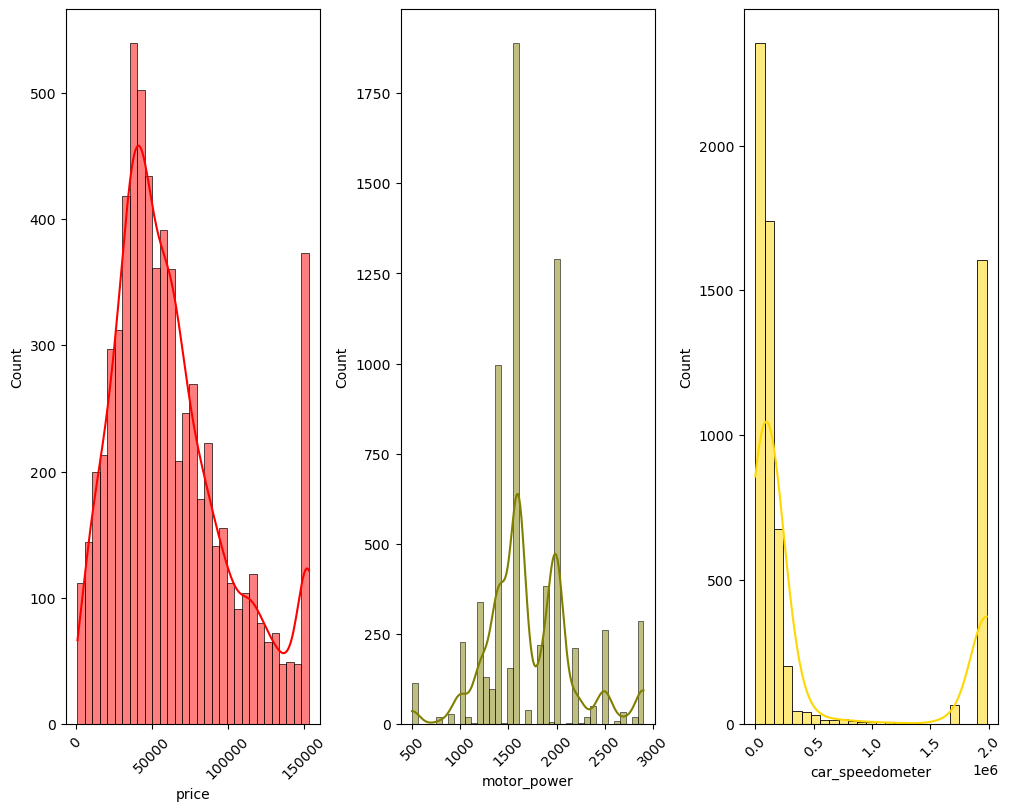

In [226]:
# Display the numaric handled columns
fig, axs = plt.subplots(1, 3, figsize=(10, 8), constrained_layout = True)

sns.histplot(data=data_ready, x="price", kde=True, color="red", ax=axs[0]).tick_params(axis='x', rotation=45)
sns.histplot(data=data_ready, x="motor_power", kde=True, color="olive", ax=axs[1]).tick_params(axis='x', rotation=45)
sns.histplot(data=data_ready, x="car_speedometer", kde=True, color="gold", ax=axs[2]).tick_params(axis='x', rotation=45)

plt.show()

## Category Columns


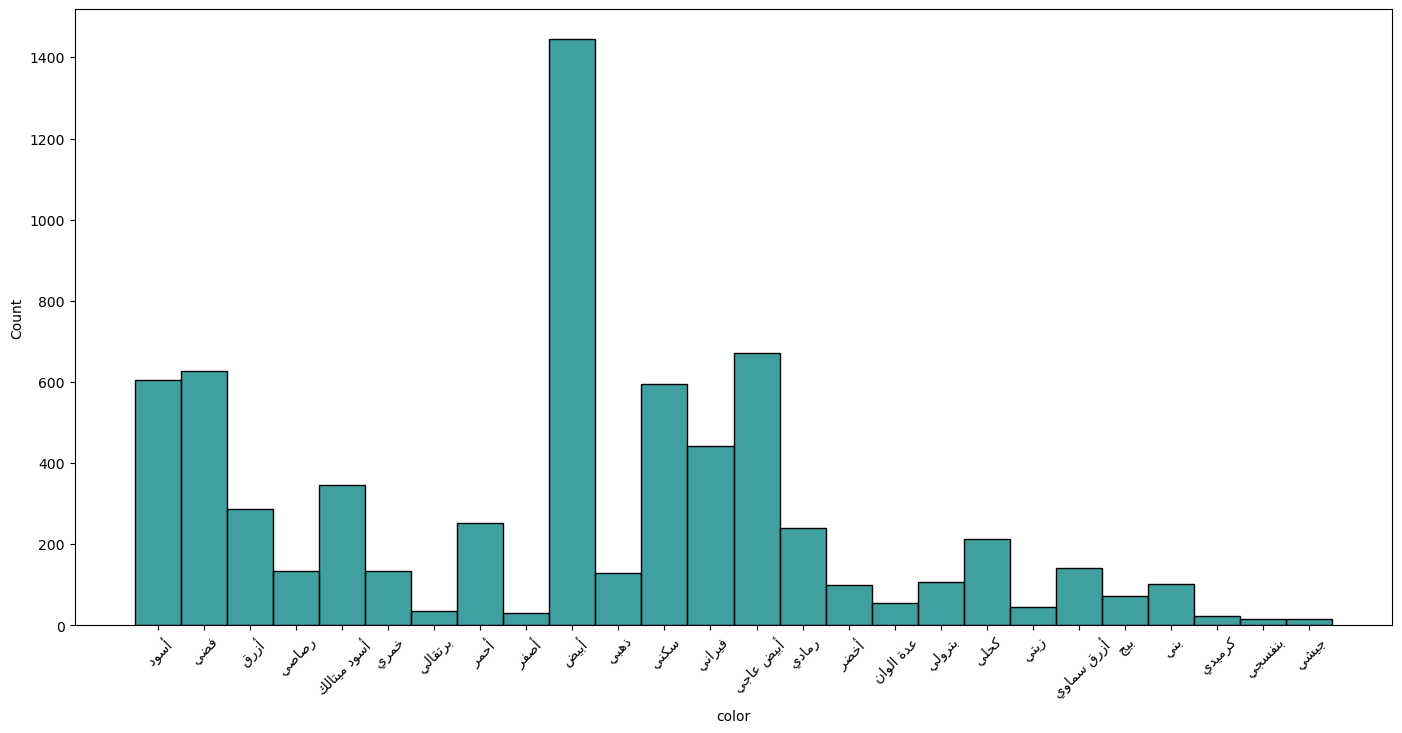

In [227]:
# Display color column
plt.subplots(figsize=(17, 8))
sns.histplot(data=display_data, x="color", color="teal").tick_params(axis='x', rotation=45)
plt.show()

## Time Series columns


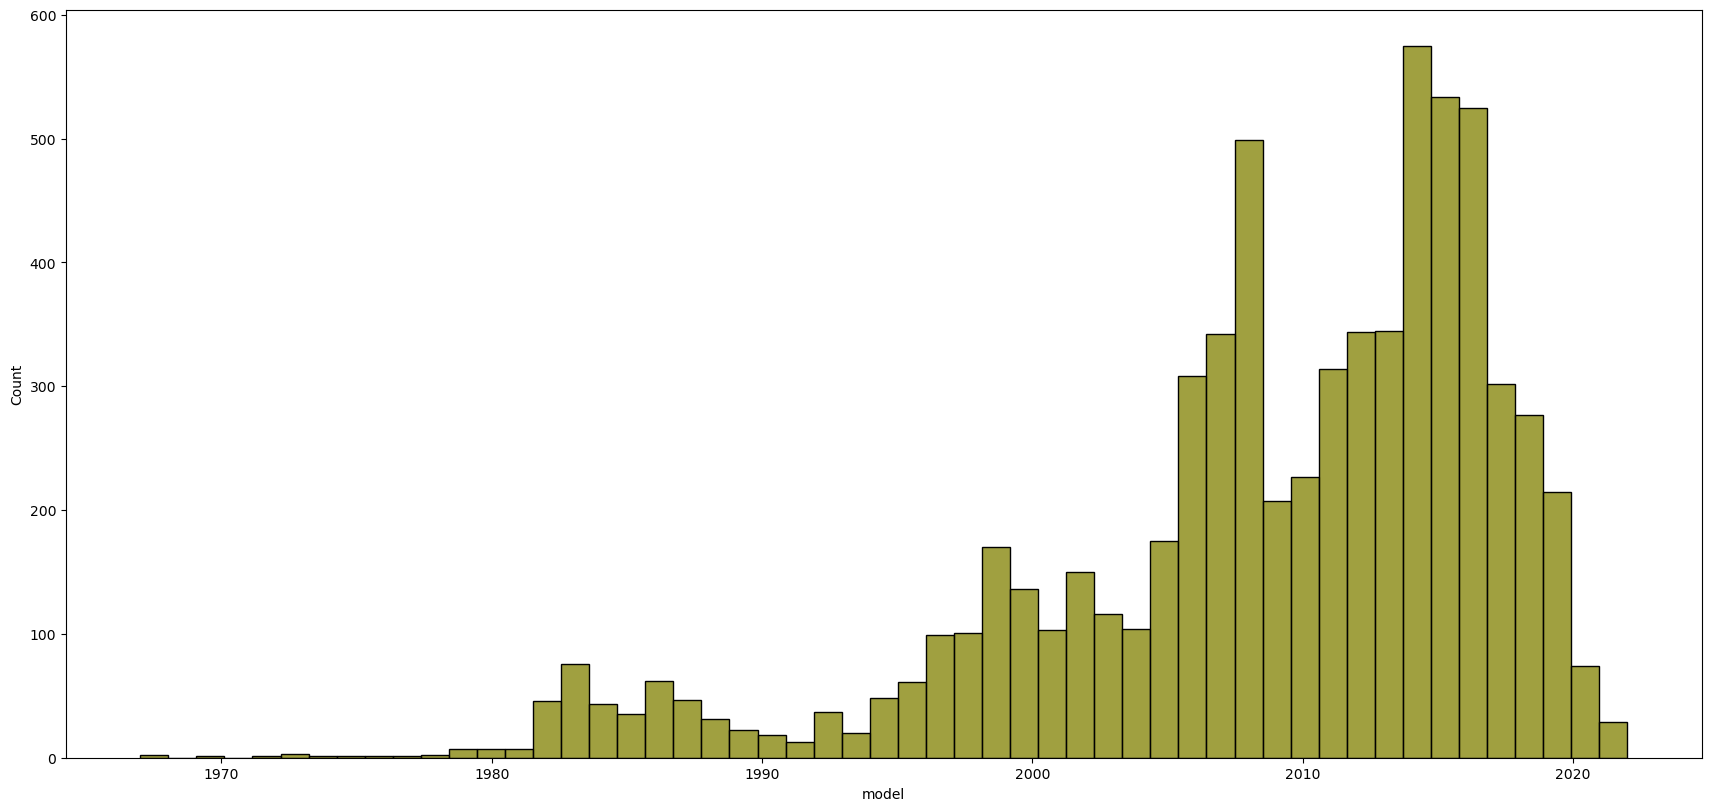

In [229]:
# Display Time Series columns
fig, axs = plt.subplots(1, figsize=(17, 8), constrained_layout = True)

sns.histplot(data=data_ready, x="model", color="olive")

plt.show()


## Multivariate analysis


In [230]:
numarical_columns = data_ready.select_dtypes(exclude='object').columns
category_columns = data_ready.select_dtypes(include='object').columns

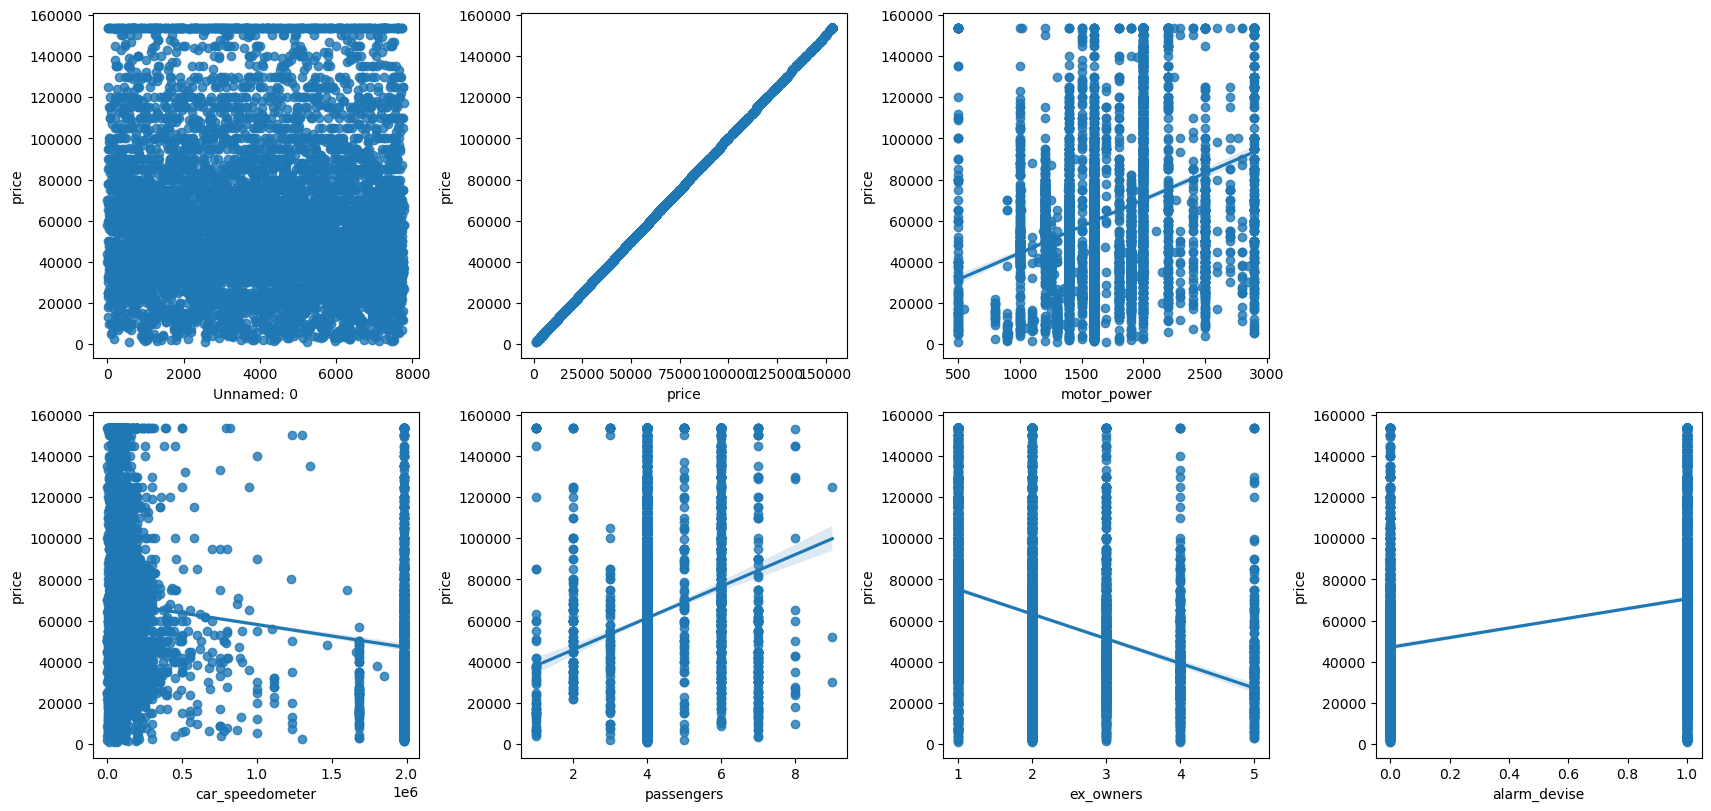

In [231]:
fig, axs = plt.subplots(2, 4, figsize=(17, 8), constrained_layout = True)
sns.regplot(x=data_ready[numarical_columns[0]], y=data_ready["price"], ax=axs[0,0])
sns.regplot(x=data_ready[numarical_columns[2]], y=data_ready["price"], ax=axs[0,1])
sns.regplot(x=data_ready[numarical_columns[3]], y=data_ready["price"], ax=axs[0,2])
fig.delaxes(axs[0,3])
sns.regplot(x=data_ready[numarical_columns[4]], y=data_ready["price"], ax=axs[1,0])
sns.regplot(x=data_ready[numarical_columns[5]], y=data_ready["price"], ax=axs[1,1])
sns.regplot(x=data_ready[numarical_columns[6]], y=data_ready["price"], ax=axs[1,2])
sns.regplot(x=data_ready[numarical_columns[7]], y=data_ready["price"], ax=axs[1,3])

plt.show()

In [232]:
most_name = data_ready['name'].value_counts()[:14]

/Users/mqbwq/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


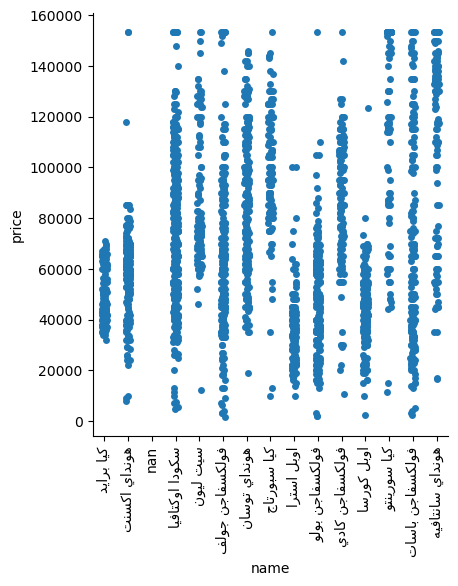

In [233]:
sns.catplot(data=display_data.loc[data_ready[category_columns[0]].isin(most_name.index)],x=category_columns[0], y=data_ready["price"]).tick_params(axis='x', rotation=90)
plt.show()

/Users/mqbwq/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


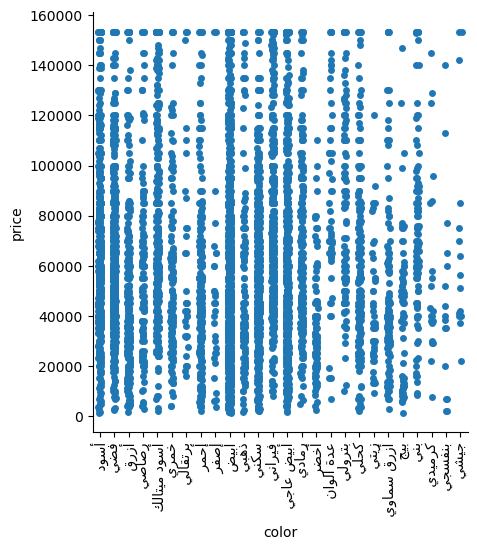

In [234]:
sns.catplot(data=display_data, x=display_data[category_columns[1]], y=data_ready["price"]).tick_params(axis='x', rotation=90)
plt.show()

/Users/mqbwq/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


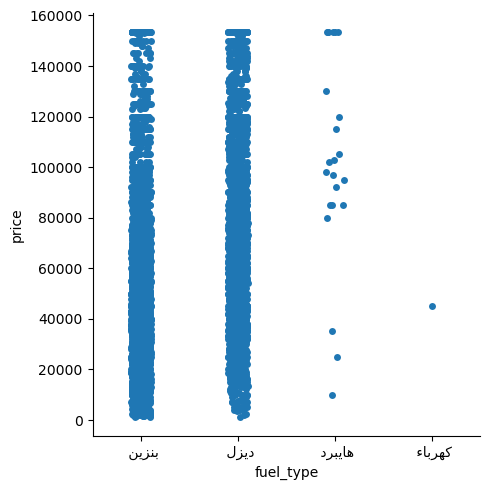

In [235]:
sns.catplot(data=display_data, x=display_data[category_columns[2]], y=data_ready["price"])
plt.show()

/Users/mqbwq/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


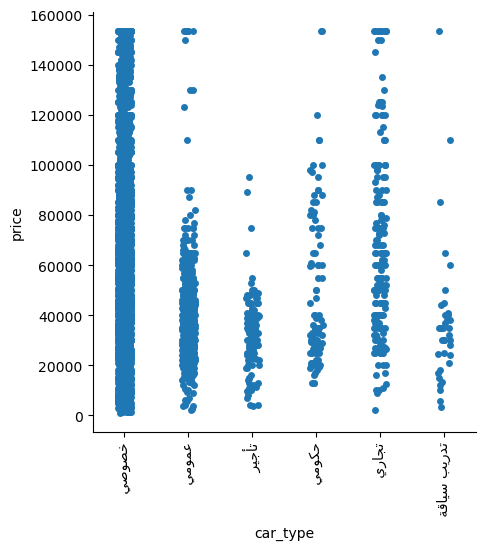

In [236]:
sns.catplot(data=display_data, x=display_data[category_columns[3]], y=data_ready["price"]).tick_params(axis='x', rotation=90) 
plt.show()

/Users/mqbwq/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


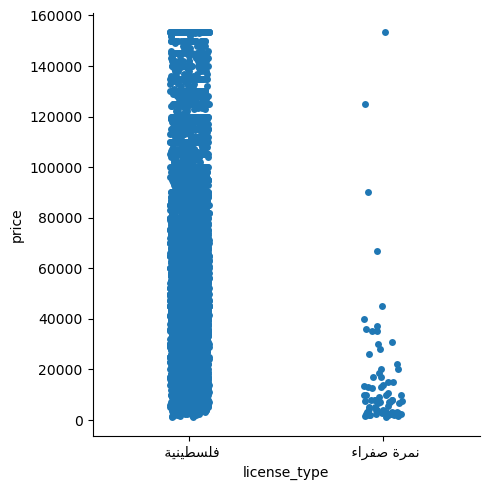

In [237]:
sns.catplot(data=display_data, x=display_data[category_columns[4]], y=data_ready["price"])
plt.show()

/Users/mqbwq/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


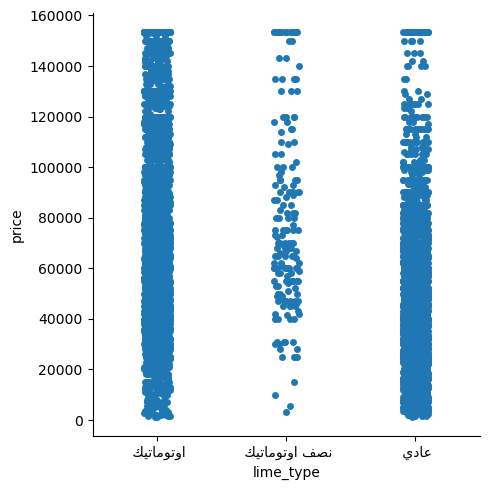

In [238]:
sns.catplot(data=display_data, x=display_data[category_columns[5]], y=data_ready["price"])
plt.show()

## Normalization Numaric columns


In [239]:
# Features name needs normalize
min_max_features = ['motor_power', 'car_speedometer']

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(data_ready[min_max_features])
min_max_transform = min_max_scaler.transform(data_ready[min_max_features])

# Modified features that needs normalize
data_ready[min_max_features] = pd.DataFrame(min_max_transform)

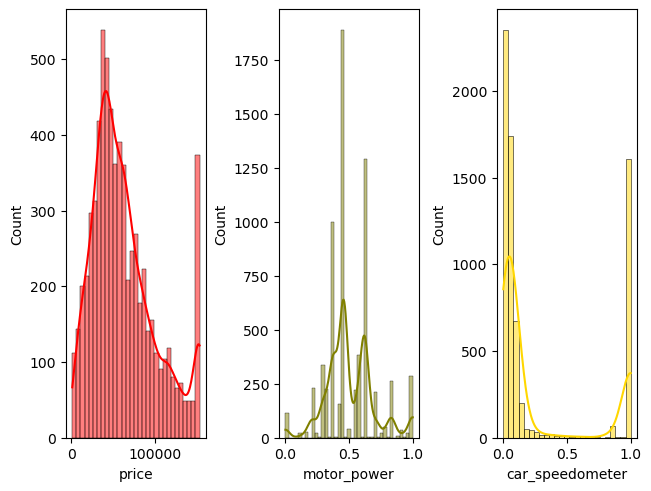

In [240]:
# Display Numaric columns
fig, axs = plt.subplots(1, 3, constrained_layout = True)

sns.histplot(data=data_ready, x="price", kde=True, color="red", ax=axs[0])
sns.histplot(data=data_ready, x="motor_power", kde=True, color="olive", ax=axs[1])
sns.histplot(data=data_ready, x="car_speedometer", kde=True, color="gold", ax=axs[2])

plt.show()

In [241]:
data_ready['name'] = PEDA.modify_name(data_ready['name'])

In [242]:
data_ready.name.unique()

array(['كيا', 'هونداي', 'بيجو', 'سكودا', 'سوبارو', 'سيت', 'مرسيدس',
       'اودي', 'فولكسفاجن', 'Dodge', 'اوبل', 'شفروليه', 'فورد', 'فولفو',
       'ستروين', 'جييب', 'تويوتا', 'ايسوزو', 'رينو', 'مازدا', 'فيات',
       'بي', 'دايو', 'أفيكو', 'الفا', 'ميتسوبيشي', 'سانغ', 'دراجة', 'جي',
       'شاحنة', 'هوندا', 'نيسان', 'داف', 'لاندروفر', 'روفر', 'داتشيا',
       'كاديلاك', 'باص', 'سوزوكي', 'ديهاتسو', 'جاجوار'], dtype=object)

##  Convert Category columns to Numaric 

In [243]:
# Name of columns required one hot encoding
one_hot_features = ['name', 'color', "glass_type", "fuel_type", "car_type", 
                    "license_type", "lime_type"]

# Create object of OneHotEncoder
onehot_encoder = OneHotEncoder(use_cat_names=True)

# One hot encoding for columns (column in one_hot_features list)
onehot_encoder.fit(data_ready[one_hot_features])

features_encoded = onehot_encoder.transform(data_ready[one_hot_features])

# columns name after one hot encoding
columns_name = onehot_encoder.get_feature_names()

# Delete the origin column
data_ready.drop(one_hot_features,  axis=1, inplace=True)

# Convert the features_encoded to dataframe
features_encoded = pd.DataFrame(features_encoded, columns = columns_name)

# Concatenate the two dataframe
data_ready = pd.concat([data_ready, features_encoded], axis=1)

/Users/mqbwq/anaconda3/lib/python3.11/site-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [245]:
# Display first 2 row
data_ready.head(2)

,Unnamed: 0,model,price,motor_power,car_speedometer,passengers,ex_owners,alarm_devise,air_conditioner,CD_recorder,...,car_type_عمومي,car_type_تأجير,car_type_حكومي,car_type_تجاري,car_type_تدريب سياقة,license_type_فلسطينية,license_type_نمرة صفراء,lime_type_اوتوماتيك,lime_type_نصف اوتوماتيك,lime_type_عادي
0,0,2008,44000,0.458333,0.092352,4.0,1,1.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
1,1,2013,58000,0.375000,0.021196,4.0,1,1.0,1.0,0.0,...,0,0,0,0,0,1,0,1,0,0


In [246]:
# Display the columns name
data_ready.columns 

Index(['Unnamed: 0', 'model', 'price', 'motor_power', 'car_speedometer',
       'passengers', 'ex_owners', 'alarm_devise', 'air_conditioner',
       'CD_recorder', 'sunroof', 'leather_upholstery', 'central_closing',
       'magnesium_rims', 'air_cushion', 'name_كيا', 'name_هونداي', 'name_بيجو',
       'name_سكودا', 'name_سوبارو', 'name_سيت', 'name_مرسيدس', 'name_اودي',
       'name_فولكسفاجن', 'name_Dodge', 'name_اوبل', 'name_شفروليه',
       'name_فورد', 'name_فولفو', 'name_ستروين', 'name_جييب', 'name_تويوتا',
       'name_ايسوزو', 'name_رينو', 'name_مازدا', 'name_فيات', 'name_بي',
       'name_دايو', 'name_أفيكو', 'name_الفا', 'name_ميتسوبيشي', 'name_سانغ',
       'name_دراجة', 'name_جي', 'name_شاحنة', 'name_هوندا', 'name_نيسان',
       'name_داف', 'name_لاندروفر', 'name_روفر', 'name_داتشيا', 'name_كاديلاك',
       'name_باص', 'name_سوزوكي', 'name_ديهاتسو', 'name_جاجوار', 'color_أسود ',
       'color_فضي ', 'color_أزرق ', 'color_رصاصي ', 'color_أسود ميتالك ',
       'color_خمري ', 'c

## Exporting Files


In [247]:
data_ready.to_csv('data/data_ready.csv', index=False)


In [250]:
# Its important to use binary mode 
knnPickle = open('./pkls/knn_imputer.pkl', 'wb') 

# source, destination 
pickle.dump(imputer, knnPickle)  

# close the file
knnPickle.close()

In [252]:
# Its important to use binary mode 
min_max_Pickle = open('./pkls/min_max_scaler.pkl', 'wb') 

# source, destination 
pickle.dump(min_max_scaler, min_max_Pickle)  

# close the file
min_max_Pickle.close()

In [253]:
# Its important to use binary mode 
onehot_Pickle = open('./pkls/onehot_encoder.pkl', 'wb') 

# source, destination 
pickle.dump(onehot_encoder, onehot_Pickle)  

# close the file
onehot_Pickle.close(

SyntaxError: incomplete input (2053533134.py, line 8)